In [1]:
# Importaciones necesarias
from pycaret.regression import *
import pandas as pd

In [2]:
#Importar los datos
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Información General de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Creación del Modelo
s = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True,
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [5]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2769.4161,24698421.9524,4956.9417,0.8225,0.4448,0.3278,0.1310
ridge,Ridge Regression,3122.4834,25460981.8579,5032.6243,0.8198,0.4402,0.3214,0.0570
lr,Linear Regression,3156.0176,25524083.8286,5037.4013,0.8197,0.4458,0.3320,0.5620
lasso,Lasso Regression,3130.2770,25506226.7505,5036.6840,0.8197,0.4419,0.3247,0.0560
br,Bayesian Ridge,3123.0010,25476931.8579,5034.4660,0.8195,0.4416,0.3192,0.0520
rf,Random Forest Regressor,2780.4582,25774646.0837,5060.4559,0.8152,0.4748,0.3334,0.2890
llar,Lasso Least Angle Regression,3155.9925,26305246.9206,5115.2358,0.8141,0.4364,0.3196,0.0540
lightgbm,Light Gradient Boosting Machine,3039.8891,25942822.3275,5080.1797,0.8124,0.5494,0.3688,0.1590
huber,Huber Regressor,2132.2699,27278146.0277,5199.6792,0.8087,0.3984,0.0873,0.0750
par,Passive Aggressive Regressor,2159.3747,27448412.8814,5218.4142,0.8073,0.3986,0.0892,0.0800


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [6]:
# Model Training and Validation
gbr = create_model('gbr')

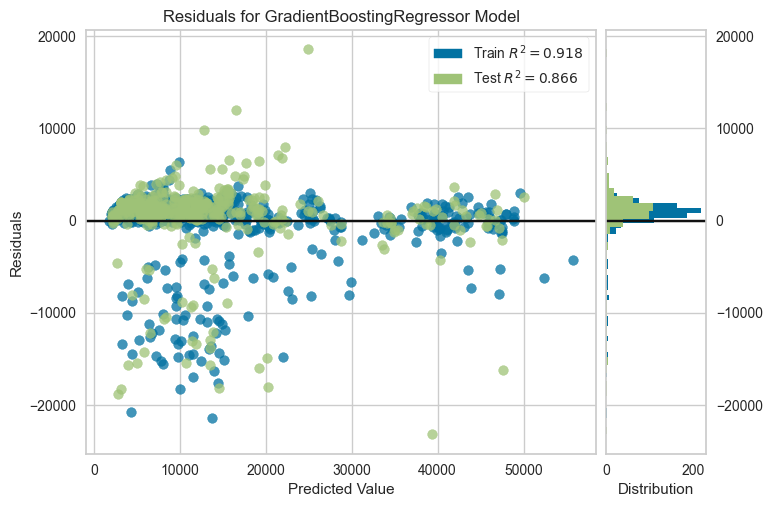

In [7]:
# plot residuals of trained model
plot_model(gbr, plot = 'residuals')

In [8]:
# save pipeline on disk
save_model(gbr, model_name = 'deployment_16092023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
               